# This notebook will demonstrate how to do basic SuperDARN data plotting.

In [9]:
%pylab inline
import datetime
import os
import matplotlib.pyplot as plt
from davitpy import pydarn

Populating the interactive namespace from numpy and matplotlib


In [15]:
sTime = datetime.datetime(2014,9,25,6)
eTime = datetime.datetime(2014,9,25,7)
radar = 'fhe'
beam  = 11

## Remote File RTI Plots

In [3]:
#The following command will print the docstring for the plotRti routine:
#pydarn.plotting.rti.plotRti?

In [ ]:
fig = plt.figure(figsize=(14,12)) #Define a figure with a custom size.
pydarn.plotting.rti.plotRti(sTime, radar, eTime=eTime, bmnum=beam)
plt.show()

Calling plot_rti.
Found cached file: /tmp/sd/20140925.060000.20140925.070000.fhe.fitex

reached end of data

In [5]:
#Now save as a PNG to your home folder...
home = os.getenv('HOME')
filename = os.path.join(home,'rti.png')
fig.savefig(filename)

In [6]:
fig.clear() #Clear the figure from memory.

## Local File RTI Plot

You can also plot data stored in a local file.  Just change the variables in the cell below.

cp /tmp/sd/20080222.000000.20080223.000000.bks.fitex /tmp/sd/1426173571
Concatenating all the files in to one
cat /tmp/sd/1426173571 > /tmp/sd/20080222.000000.20080223.000000.bks.fitex
rm /tmp/sd/1426173571

reached end of data
plotting took: 0:00:05.474366


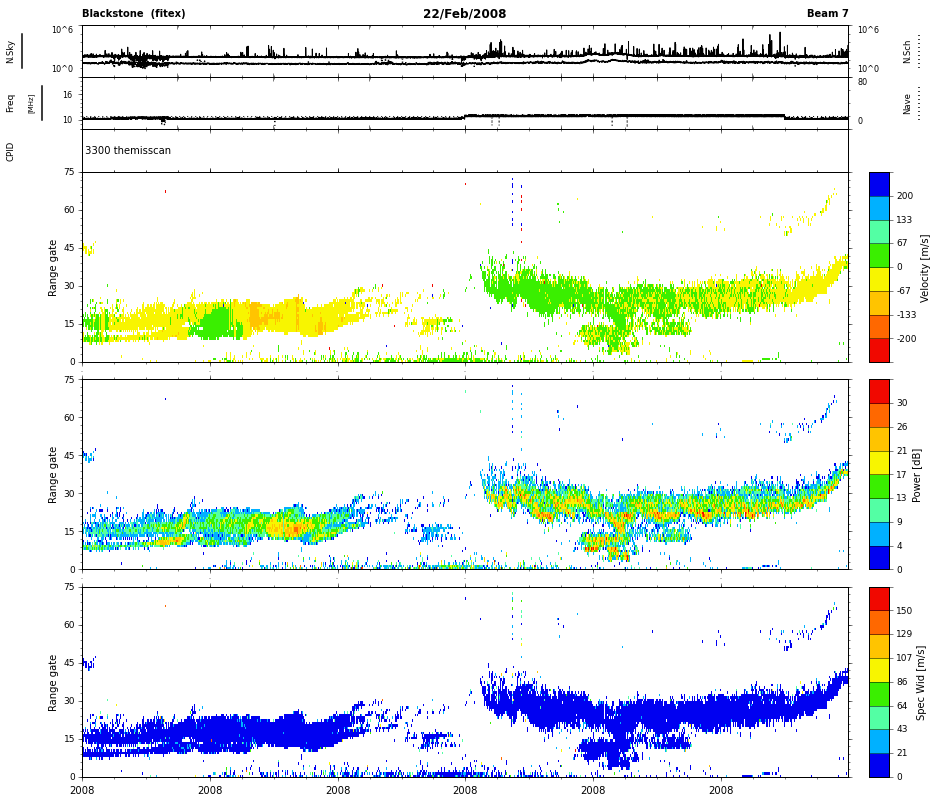

In [7]:
fileName = '/tmp/sd/20080222.000000.20080223.000000.bks.fitex'
fileType = 'fitex'
radar = 'bks'
beam  = 7
sTime = datetime.datetime(2008,2,22)
eTime = datetime.datetime(2008,2,23)

fig = plt.figure(figsize=(14,12)) #Define a figure with a custom size.
pydarn.plotting.rti.plotRti(sTime, radar, eTime=eTime, bmnum=beam, figure=fig, fileName=fileName,fileType=fileType)
plt.show()


In [8]:
fig.clear() #Clear the figure from memory.

# Fan Plots

Right now we don't have plotFan setup to accept local files.  But, we will add that in shortly.

## Geopgraphic Coordinates

Found cached file: /tmp/sd/20130316.163000.20130316.163100.fhe.fitex
Found cached file: /tmp/sd/20130316.163000.20130316.163100.fhw.fitex
Warning, setting dateTime to datetime
Warning, setting dateTime to datetime
0:00:04.784423

reached end of data

reached end of data

/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)
/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


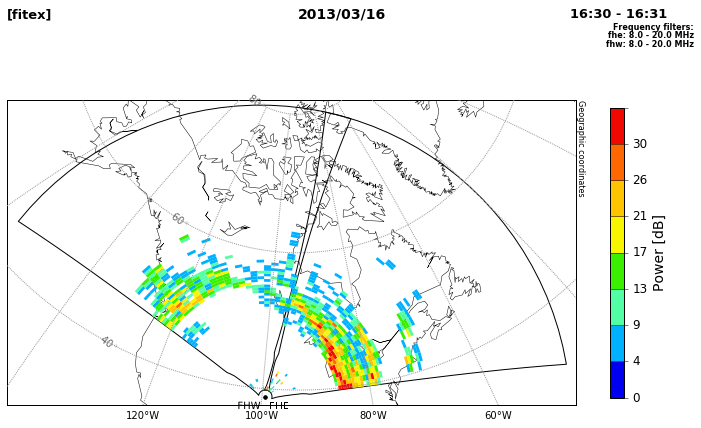

In [13]:
import datetime
import os
import matplotlib.pyplot as plt
from davitpy import pydarn

pydarn.plotting.fan.plotFan(datetime.datetime(2013,3,16,16,30),['fhe','fhw'],param='power',gsct=False)

## Magnetic Coordinates

Magnetic coordinates still need a little work.  For instance, high latitude continent lines don't always plot.  Also, we are working on getting Simon's new AACGM system in place (http://dx.doi.org/doi/10.1002/2014JA020264).  Not there yet...

Found cached file: /tmp/sd/20140925.060200.20140925.060300.cvw.fitex
Found cached file: /tmp/sd/20140925.060200.20140925.060300.cve.fitex
Found cached file: /tmp/sd/20140925.060200.20140925.060300.fhe.fitex
Warning, setting dateTime to datetime
Warning, setting dateTime to datetime
0:00:04.400967

reached end of data

reached end of data

reached end of data


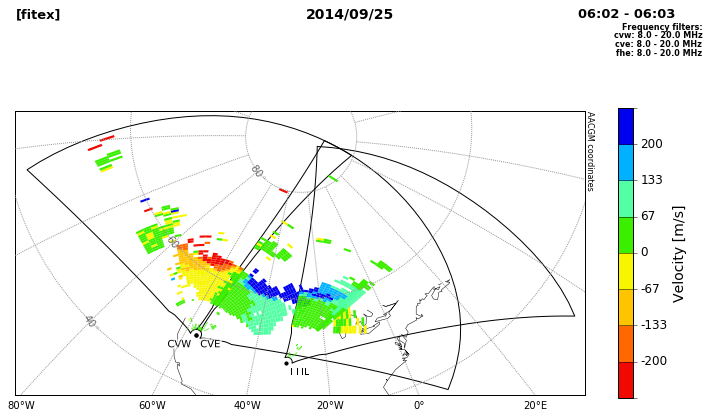

In [14]:
import datetime
import os
import matplotlib.pyplot as plt
from davitpy import pydarn

pydarn.plotting.fan.plotFan(datetime.datetime(2014,9,25,6,2),['cvw','cve','fhe'],param='velocity',gsct=False,coords='mag')

# Convection Plotting

Warning, datetime/dateTime not specified, using current time.
Found cached file: /tmp/sd/20140925.060200.20140925.060400.north.grdex
Found cached file: /tmp/sd/20140925.060200.20140925.060400.north.mapex


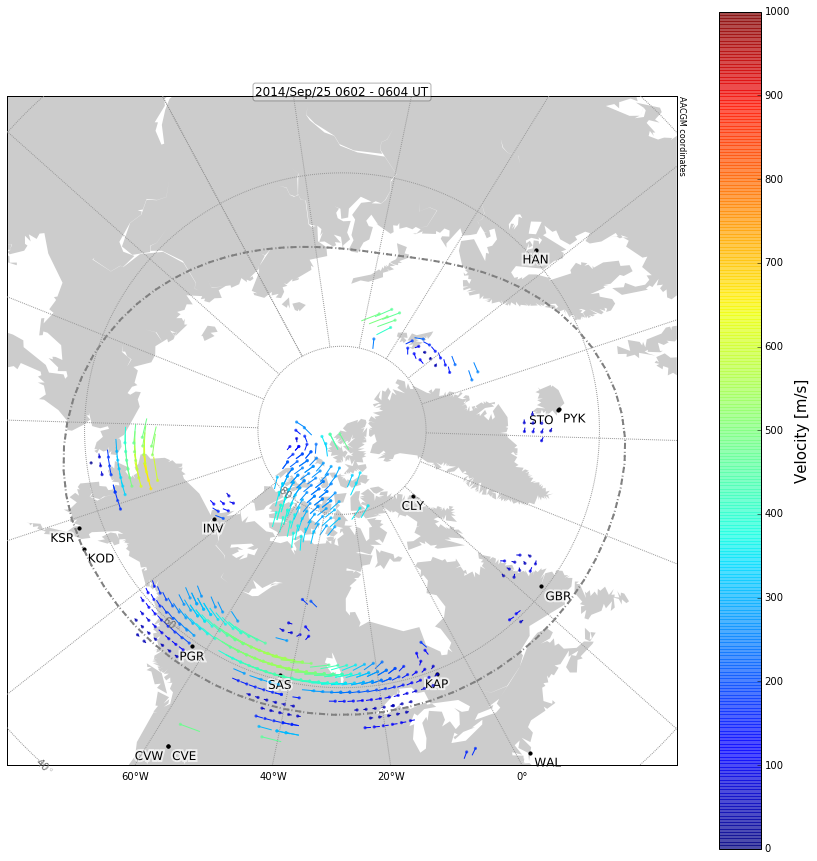

In [7]:
import datetime
import matplotlib.pyplot as plt
import davitpy.pydarn.plotting.plotMapGrd
from davitpy.utils import *

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sdate = datetime.datetime(2014,9,25,6,2)
mObj = plotUtils.mapObj(boundinglat=50.,gridLabels=True, coords='mag')
mapDatObj = davitpy.pydarn.plotting.plotMapGrd.MapConv(sdate, mObj, ax)
mapDatObj.overlayMapFitVel()
#mapDatObj.overlayCnvCntrs()
mapDatObj.overlayHMB()